# Diversité et dynamique des choanoflagellés dans les eaux côtières de Roscoff

## Introduction

Ce notebook regroupe l'ensemble des analyses faites, mis à part les sections de code *bash* qui se situent dans le notebook `taxoaasign-bash.ipynb`. 

#### *Préparation de l'environnement de travail*

Afin de pouvoir réutiliser ce script tel quel, il vous faut organiser votre répertoire de travail (*working directory*) avec 2 sous-dossiers principaux :
- ***Input*** : où seront rangées les données d'entrée
- ***Output*** : où seront placés les fichiers créés
- ***Output/Figures*** : contiendra plus spécifiquement les figures produites

In [1]:
if (!dir.exists("Input")) {
  dir.create("Input")
  cat("Le sous-dossier a été créé.\n")
} else {
  cat("Le sous-dossier existe déjà.\n")
}

if (!dir.exists("Output")) {
  dir.create("Output")
  cat("Le sous-dossier a été créé.\n")
} else {
  cat("Le sous-dossier existe déjà.\n")
}

if (!dir.exists("Output/Figures")) {
  dir.create("Output/Figures")
  cat("Le sous-dossier a été créé.\n")
} else {
  cat("Le sous-dossier existe déjà.\n")
}

Le sous-dossier existe déjà.
Le sous-dossier existe déjà.
Le sous-dossier existe déjà.


Il faut également importer/charger les packages qui seront utilisés : 

In [39]:
# Load packages 
package_names <- c("tidyverse", "Biostrings", "data.table", "ape", "treeio", "tidytree", "ggplot2")
for (i in package_names){
    if (!require(i, character.only = TRUE)) {
    install.packages(i, dependencies = TRUE)
    print(i, "has been installed")}
    suppressWarnings(suppressPackageStartupMessages(library(i, character.only = TRUE)))
    print(paste0(i, " as been loaded"))
  }

# Set working directory

[1] "tidyverse as been loaded"
[1] "Biostrings as been loaded"
[1] "data.table as been loaded"
[1] "ape as been loaded"
[1] "treeio as been loaded"
[1] "tidytree as been loaded"
[1] "ggplot2 as been loaded"


## 1) Préparation du jeu de données

Le jeu de données sur lequel nous travaillons est intitulé "SOMLIT-Astan time-series (2009-2016) rDNA 18S V4 ASV table (dada2)". Il provient du travail de Henry, N., Caracciolo, M., Romac, S., Rigaut-Jalabert, F., & Simon, N. (2023). 
Il est disponible sur cette [page zenodo](https://doi.org/10.5281/zenodo.8392525) ou directement téléchargeable en cliquant sur ce [lien](https://zenodo.org/records/8392525/files/astan-18sv4_dada2_v1.0.filtered.table.with.taxo.lulu.tsv.gz?download=1).

Après avoir téléchargé le dossier zip, il faut extraire le fichier .tsv et le placer dans votre dossier de travail (*working directory*). 

Il peut maintenant être importé dans votre environnement de travail (cf. script suivant).

In [3]:
data <- read.delim("Input/astan-18sv4_dada2_v1.0.filtered.table.with.taxo.lulu.tsv.gz.tsv")
# visualisation du jeu de données
head(data)

,amplicon,taxonomy,confidence,sequence,total,spread,RA140605.3,RA150227.3,RA140423.3,RA140522.3,⋯,RA160812.02,RA160826.02,RA160909.02,RA160923.02,RA161010.02,RA161024.02,RA161108.02,RA161122.02,RA161207.02,RA161222.02
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,123a196cd43669647619a27fb05e1d9744b85a22,Root;Eukaryota;Hacrobia;Cryptophyta;Cryptophyceae;Cryptomonadales;Cryptomonadales_X;unclassified_Cryptomonadales_X,100;100;100;100;100;68.4;68.4;68.4,AGCTCTAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGATGTCGGGCTCGGGCAAGCTGTCGGCCTTTGGTCGGACGGCAGGCTCGGGTCTTTCTGCCTGAGGAACCCGGTTGCTTTAACGAGCTGCCGGTGGACGCAGGTCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCTAGCGCTTGAATACATTAGCATGGAATAATGGAATAGGACTTTGGTGCTATTTTGTTGGTTTATGGGACCGAAGTAATGATTAACAGGGACAGTTGGGGCCGTTTATATTTCGTTGTCAGAGGTGAAATTCTTGGATTTACGAAAGATAAACTTCTGCGAAAGCATTCGGCAAGGATGTTTTCA,1814335,375,691,1593,824,694,⋯,15738,18939,17072,17914,10311,11851,12718,7255,10674,9354
2,230c7133a34050bab65b78e86e2626079801e63d,Root;Eukaryota;Archaeplastida;Chlorophyta;Mamiellophyceae;Mamiellales;Bathycoccaceae;Ostreococcus;Ostreococcus_lucimarinus,100;100;100;100;100;100;99.2;99.2;60.8,AGCTCCAATAGCGTATATTTAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGATTTTGGCTGAGAACGGTCGGTCCGCCGTTAGGTGTGCACTGACTGGTCTCAGCTTCCTGGTGAGGAGGTGTGCTTCATCGCCACTTAGTCACCGTGGTTACTTTGAAAAAATTAGAGTGTTCAAAGCGGGCTTACGCTTGAATATATTAGCATGGAATAACACCATAGGACTCCTGTCCTATTTCGTTGGTCTCGGGACGGGAGTAATGATTAAGAGGAACAGTTGGGGGCATTCGTATTTCATTGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACTTCTGCGAAAGCATTTGCCAAGGATGTTTTCA,1124268,373,246,53,288,2300,⋯,20798,13563,4289,8184,4780,7419,4688,1772,3301,4973
3,1b072f6adb62dde7d2d9fb63318df594dcc6ca49,Root;Eukaryota;Alveolata;Dinoflagellata;Dinophyceae;unclassified_Dinophyceae,100;100;99.2;99.2;99.2;99.2,AGCTCCAATAGCGTATATTAAAGTTGTTGCGGTTAAAAAGCTCGTAGTTGGATTTCTGCCGAGGACGACCGGTCCGCCCTCTGGGTGAGTATCTGGTTCGGCCTGGGCATCTTCTTGGAGAACGTATCTGCACTTGACTGTGTGGTGCGGTATCCAGGACTTTTACTTTGAGGAAATTAGAGTGTTTCAAGCAGGCACACGCCTTGAATACATTAGCATGGAATAATAAGATAGGACCTTGGTTCTATTTTGTTGGTTTCTAGAGCTGAGGTAATGATTAATAGGGATAGTTGGGGGCATTCGTATTTAACTGTCAGAGGTGAAATTCTTGGATTTGTTAAAGACGGACTACTGCGAAAGCATTTGCCAAGGATGTTTTCA,1069518,375,1268,1053,2076,746,⋯,1564,3265,1114,2294,1756,3479,4403,2791,3395,5854
4,825297e147a702dc67e5e289dc617d60a76e4910,Root;Eukaryota;Hacrobia;Cryptophyta;Cryptophyceae;Cryptomonadales;Cryptomonadales_X;Teleaulax;unclassified_Teleaulax,100;100;100;100;100;98.4;97.4;85.8;85.8,AGCTCTAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGATGTCGGGCTCGGGCAGGCTGTCGGCTTCGGTCGGACGGCAGGCTCGGGTCTTTCTGCCTGAGGATCCCGTTGCACTTAATTGTGGGGCGTGGGGACGCAGGCCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCTACGCTTGAATACATTAGCATGGAATAATGGAATAGGACTTTGGTGCTATTTTGTTGGTTTATGGGACCGAAGTAATGATTAACAGGGACAGTTGGGGCCGTTTATATTTCGTTGTCAGAGGTGAAATTCTTGGATTTACGAAAGATAAACTTCTGCGAAAGCATTCGGCAAGGATGTTTTCA,1046722,375,364,911,347,448,⋯,5199,8875,10685,7963,5591,3280,3056,3092,5438,7071
5,78ff1db954d789e79a07b58dd689c285357f3610,Root;Eukaryota;Hacrobia;Cryptophyta;Cryptophyceae;Cryptomonadales;Cryptomonadales_X;unclassified_Cryptomonadales_X,95.3;95.3;95.3;95.3;95.3;93.6;91.6;91.6,AGCTCTAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGATGTCGGGCTCGGGCAGGCTGTCGGCTTCGGTCGGACGGCAGGCTCGGGTCTTTCTGCCTGAGGATCCCGTGCACTTTATTGTGGGCGGGGGACGCAGGCCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCTACGCTTGAATACATTAGCATGGAATAATGGAATAGGACTTTGGTGCTATTTTGTTGGTTTATGGGACCGAAGTAATGATTAACAGGGACAGTTGGGGCCGTTTATATTTCGTTGTCAGAGGTGAAATTCTTGGATTTACGAAAGATAAACTTCTGCGAAAGCATTCGGCAAGGATGTTTTCA,581058,371,127,1593,448,258,⋯,1544,3494,4506,3282,3290,3386,1919,1674,2458,2684
6,d0e5ff9d3ca5173c9574a122fbe1eca6a873d5f8,Root;Eukaryota;Hacrobia;Cryptophyta;Cryptophyceae;Cryptomonadales;Cryptomonadales_X;Teleaulax;Teleaulax_acuta,100;100;100;100;100;97.6;95;86.1;74.1,AGCTCTAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGATGTCGGGCTCGGGCAGGCTGTCGGCTTCGGTCGGACGGCAGGCTCGGGTCTTTCTGCCTGAGGAACCCGTGGCACTTAACTGTGCGGCGTGGGGACGCAGGCCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCTACGCTTGAATACATTAGCATGGAATAATGGAATAGGACTTTG

La description complète du jeu de données est accessible sur [la page zenodo](https://zenodo.org/records/8392525).
Pour rappel : Le jeu de données consiste en une liste d'ASV (***amplicon***), séquencés à partir des échantillons Astan entre 2009 et 2016, auxquels sont associés :
- une assignation taxonomique faite avec la méthode IDTAXA utilisant la base de référence PR2 version 4.14 (colonne ***taxonomy***), 
- le taux de confiance de ces assignations (***confidence***), 
- la séquence ADNr de la région V4 de la petite sous-unité 18S (***sequence***),
- le nombre total de reads de l'ASV sur l'ensemble des échantillons (***total***),
- le nombre d'échantillons où l'ASV a été séquencé (***spread***),
- le nombre de reads par échantillons (colonnes commançant par ***RA*** suivi d'une série de 6 chiffres correspondant à une ***date YYMMDD***). Il y a deux types d'échantillons par date, correspondant à deux fractions de taille : entre 0.2µm et 3µm (nom de colonne se terminant par ***02***) et supérieur à 3µm (nom de colonne se terminant par ***3***).

Les Choanoflagellés ayant une taille comprise entre **3µm** et **10µm** ([King, 2005](https://www.cell.com/current-biology/fulltext/S0960-9822(05)00142-9)), nous avons décidé d'analyser seulement les échantillons correspondant à la fraction >3µm. Nous retirons donc les colonnes se terminant par *02*.

In [4]:
data2 <- data[, -grep("02$", names(data))]

Afin de s'assurer qu'il n'y a pas d'erreurs d'importation ou d'absence de données, nous verifions s'il y a présence de *NA*.

In [5]:
summary(is.na(data2))

  amplicon        taxonomy       confidence       sequence      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8113      FALSE:8113      FALSE:8113      FALSE:8113     
   total           spread        RA140605.3      RA150227.3     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8113      FALSE:8113      FALSE:8113      FALSE:8113     
 RA140423.3      RA140522.3      RA140620.3      RA140721.3     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8113      FALSE:8113      FALSE:8113      FALSE:8113     
 RA140819.3      RA140904.3      RA141002.3      RA141016.3     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8113      FALSE:8113      FALSE:8113      FALSE:8113     
 RA141031.3      RA141114.3      RA141201.3      RA150114.3     
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:8113      FALSE:8113      FALSE:8113      FALSE:8113     
 RA150128.3      RA150212

Nous nous intéressons seulement à la contribution des Choanoflagellés à la diversité des *Eucaryotes*. Nous effectuons donc un tri pour ne garder que les ASVs assignés au domaine Eucaryote :

In [6]:
data3 <- data2[grep("^Root;Eukaryota", data2$taxonomy), ]

Pour faciliter la manipulation des données, nous renommons les colonnes échantillons (RAXXXXXX) pour que leurs noms ne contiennent que les dates, afin de les réarranger ensuite par ordre chronologique :

In [7]:
# récupère le colonnes ne correspondant pas aux échantillons
non_date_columns <- data3[, 1:6] 
# récupère les colonnes correspondant aux échantillons
date_columns <- data3[, 7:ncol(data3)]
# récupère la date dans les noms de colonnes
date_part <- sub("^RA(\\d{6})\\.3$", "\\1", names(date_columns))
# convertie les dates chiffrées au format date 
dates <- as.Date(paste0("20", date_part), format = "%Y%m%d")
# réarrangement dans l'ordre chronologique
sorted_indices <- order(dates, na.last = TRUE)
date_columns <- date_columns[, sorted_indices]
colnames(date_columns) <- format(dates[sorted_indices], "%Y-%m-%d")
# colle les 2 parties du jeu de données
data4 <- cbind(non_date_columns, date_columns)
#vérification
head(data4 %>% select(starts_with("20")))

,2009-01-07,2009-01-20,2009-02-05,2009-02-18,2009-03-06,2009-03-20,2009-04-03,2009-04-16,2009-05-04,2009-05-18,⋯,2016-08-12,2016-08-26,2016-09-09,2016-09-23,2016-10-10,2016-10-24,2016-11-08,2016-11-22,2016-12-07,2016-12-22
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,506,643,775,755,591,459,420,568,1081,892,⋯,4342,11389,2433,6501,6840,8757,9679,4615,6060,3204
2,101,210,131,64,304,417,499,270,422,55,⋯,1579,4114,751,4342,2068,3088,3108,1805,736,1498
3,1405,1865,2731,1511,1078,2293,1338,2764,1270,3032,⋯,1925,15370,1226,5990,6838,4917,16254,8685,5287,5394
4,264,312,471,349,320,347,280,317,532,438,⋯,2205,6015,1742,3487,3898,2271,2664,1464,3267,2203
5,366,383,442,370,306,279,199,296,378,215,⋯,799,2999,908,1608,2838,2865,2215,1012,2097,1158
6,137,175,192,114,71,75,58,116,347,349,⋯,2167,3787,778,2339,3263,2436,4585,2504,3991,1610


**!Peut etre à enlever!**

Afin de vérifier que nous ne ratons pas *trop* de présence de ASV en enlevant les colonnes correspondant aux fractions < 3µm, nous comparons la sommes des reads de chaque AVS pour tous les échantillons à la colonne ***total***.

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `Craspedida == T`.
[1mCaused by error:[22m
[33m![39m object 'Craspedida' not found


Nous visualisons le nombre de reads par échantillons afin de vérifier si la présence d'éventuels échantillons "anormaux" (problèmes lors de l'étape d'amplification) :

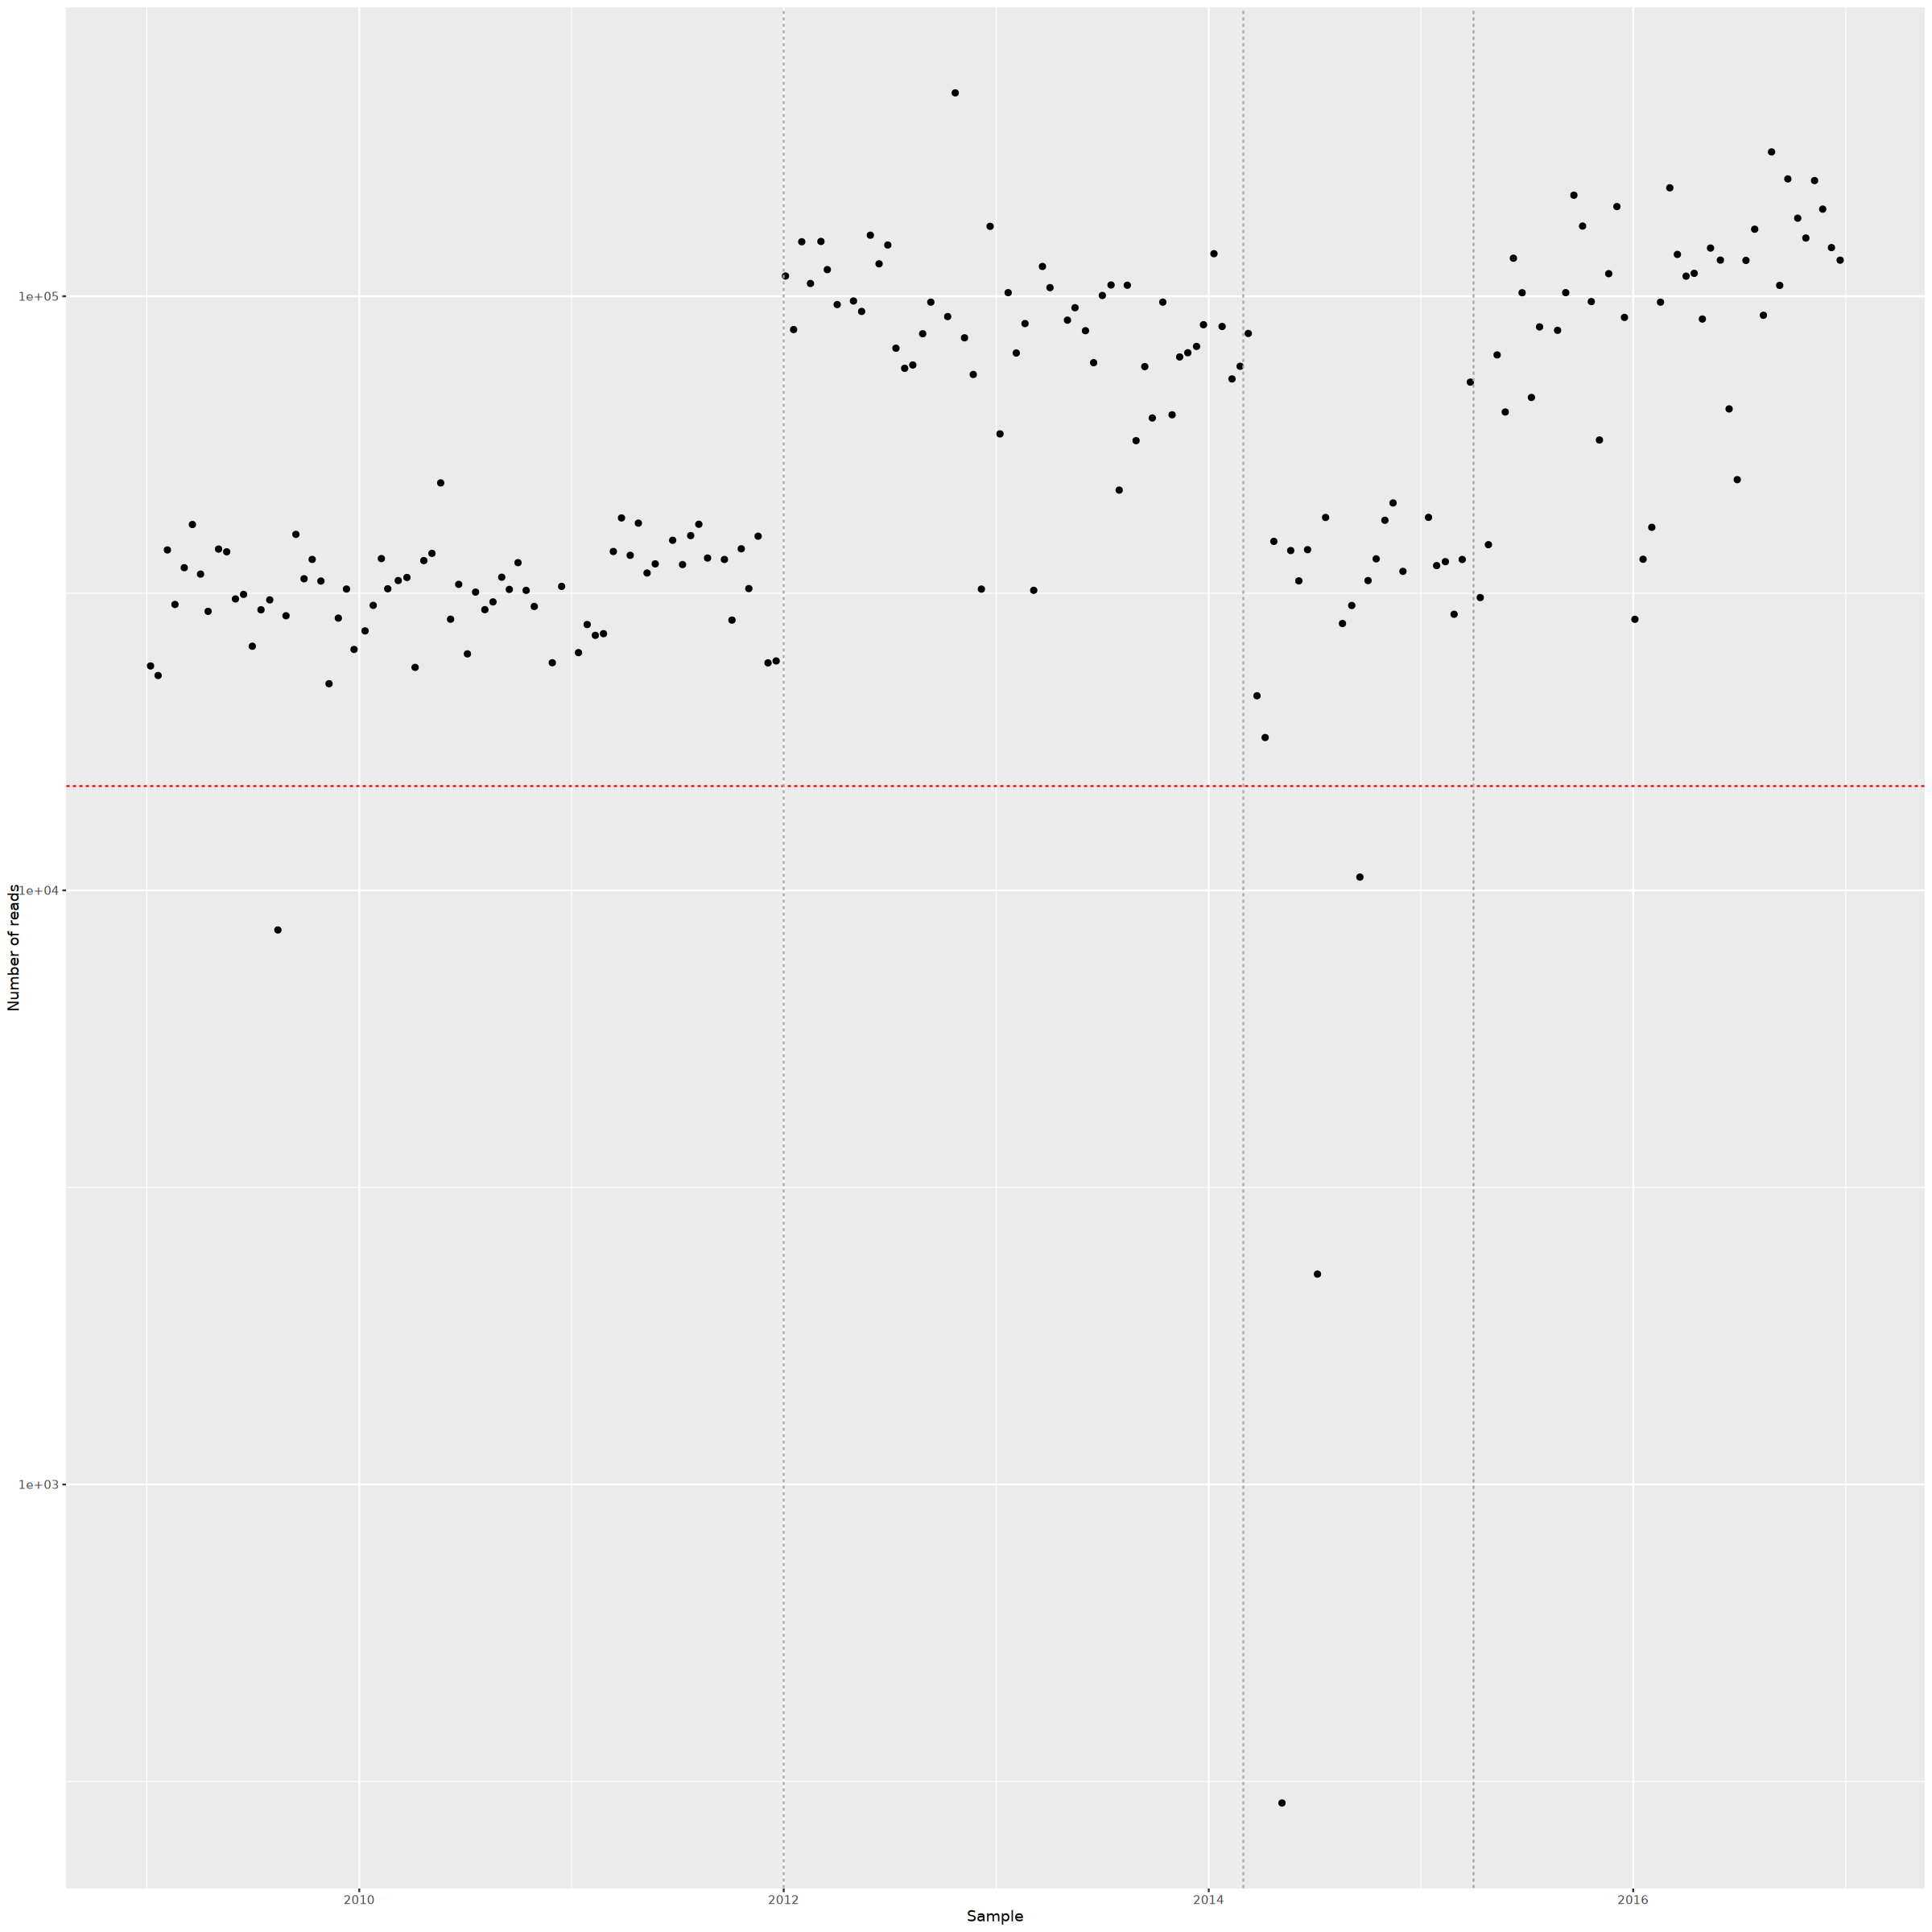

In [29]:
# Conversion au format long
data4_long <- data4 %>% 
    select(amplicon, starts_with("2")) %>%
    pivot_longer(cols=starts_with("2"))

# Nouveau tableau de la somme des reads par échantillon
Somme <- data4_long %>% group_by(name) %>% summarise("total_sample_reads"= sum(value))

# Visualisation
ggplot(Somme) +
    geom_point(aes(x= as.Date(name), y=total_sample_reads))+
    labs (x="Sample", y="Number of reads") + 
    scale_y_log10()+
    geom_hline(aes(yintercept=15000), color="red", linetype = 2) +
    geom_vline(aes(xintercept=as.Date("2012-01-01")),color="darkgrey", linetype = 2)+
    geom_vline(aes(xintercept=as.Date("2014-03-01")),color="darkgrey", linetype = 2)+
    geom_vline(aes(xintercept=as.Date("2015-04-01")),color="darkgrey", linetype = 2)

Nous remarquons que 4 échantillons présentent un nombre total de reads très inférieur aux autres. Nous décidons de les enlever de l'analyse en retirant les échantillons avec un nombre total de reads inférieur à 15000 :

[1] "187-183 = 4"


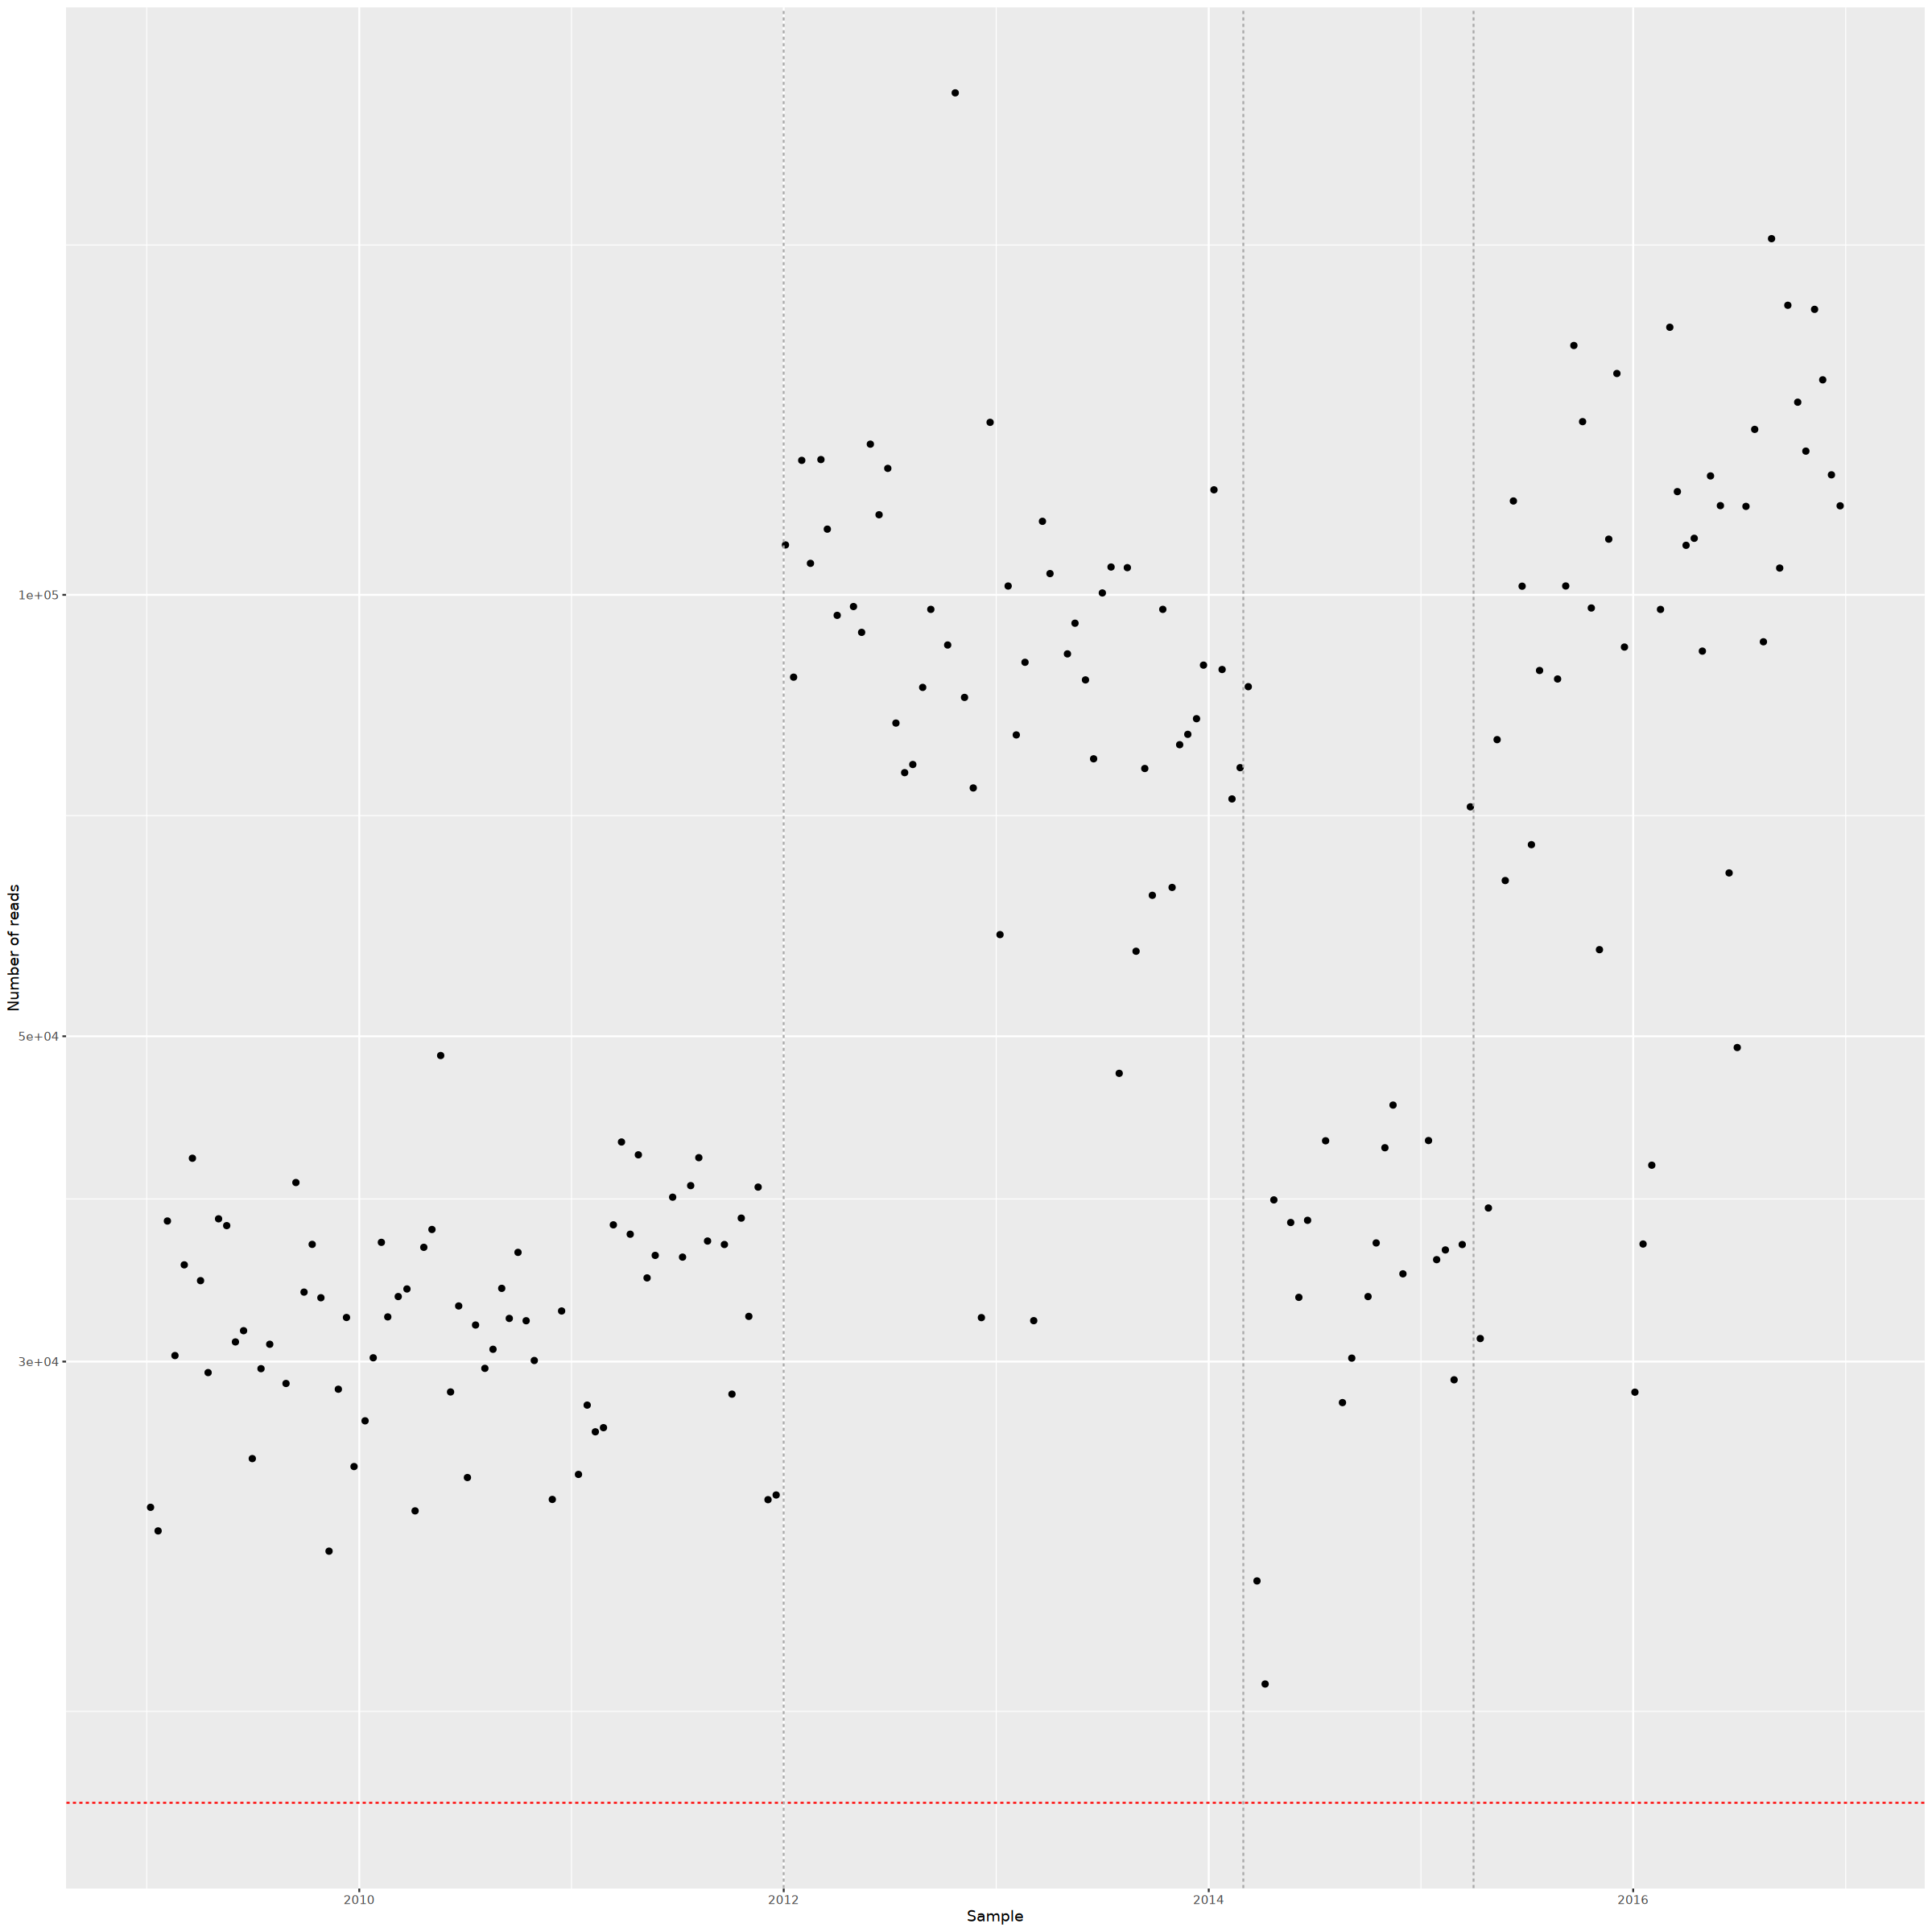

In [30]:
# Ajout de l'info Somme au data4 format long
data4_long <- full_join(data4_long, Somme, by= c("name"))

# Filtration du jeu de données
good_samples <- data4_long %>% 
    filter(total_sample_reads > 15000) %>% 
    pull(name) %>% 
    unique()
# Vérification 
print(paste0(length(levels(as.factor(data4_long$name))), "-", length(good_samples), " = ", length(levels(as.factor(data4_long$name)))-length(good_samples))) 

data5 <- data4 %>% 
    select("amplicon","taxonomy",'confidence','sequence','total', 'spread', all_of(good_samples))

# Visualisation  
ggplot(data5 %>% 
        select(amplicon, starts_with("2")) %>%
        pivot_longer(cols=starts_with("2")) %>% 
        group_by(name) %>%
        summarise("total_sample_reads"= sum(value))) +
    geom_point(aes(x= as.Date(name), y=total_sample_reads))+
    labs (x="Sample", y="Number of reads") + 
    scale_y_log10()+
    geom_hline(aes(yintercept=15000), color="red", linetype = 2) +
    geom_vline(aes(xintercept=as.Date("2012-01-01")),color="darkgrey", linetype = 2)+
    geom_vline(aes(xintercept=as.Date("2014-03-01")),color="darkgrey", linetype = 2)+
    geom_vline(aes(xintercept=as.Date("2015-04-01")),color="darkgrey", linetype = 2)

Nous remarquons que le nombre total de reads est très variable, avec quatre périodes bien distinctes (délimitées par les lignes verticales pointillées). Cette variabilité s'explique par des changements dans le protocole ?? d'extraction et d'amplification ?? Afin d'éviter les biais de méthodes, nous allons étudier la **proportion** de reads d'ASV (au sein du total des reads d'ASV Eucaryote).

## 2) Etude de la diversité globale des Choanoflagellés au sein des Eucaryotes sur l'ensemble de la période d'échantilonnage

Nous distinguons les ASV correspondant au Choanoflagellés :

In [32]:
data5 <- mutate(data5, choanoflagellates = grepl("Choanoflagellida", taxonomy, ignore.case = TRUE))
summary(data5$choanoflagellates)

#Proportion des ASV Choanoflagellés par rapport au total Eucaryote
mean(data5$choanoflagellates) # mean d'un boolen, calcule la proportion de "TRUE"

   Mode   FALSE    TRUE 
logical    6001      84 

[1] 0.01380444

On a 84 Choanoflagellés identifiés parmi les 6085 ASVs listés ici, ce qui correspond à une proportion de Choanoflagellés de 84/6085=0,0138 soit 1,38% des séquences ADNr Eucaryotes échantillonnées.

#### A) Contribution à la diversité des ASV Eucaryotes

#####  1 - Contribution des **Acanthoecida** (avec lorica) :

In [33]:
data5 <- mutate(data5, Acanthoecida = grepl("Acanthoecida", taxonomy, ignore.case = TRUE))
summary(data5$Acanthoecida)

#Proportion des ASV Acanthoecida
#Par rapport au total Eucaryote
mean(data5$Acanthoecida) # mean d'un boolen, calcule la proportion de True 
#Par rapport au total Chaono
length(which(data5$Acanthoecida==T))/length(which(data5$choanoflagellates==T))

   Mode   FALSE    TRUE 
logical    6040      45 

[1] 0.007395234

[1] 0.5357143

##### 2 - Contribution des **Craspedida** (sans lorica) :

In [34]:
data5 <- mutate(data5, Craspedida = grepl("Craspedida", taxonomy, ignore.case = TRUE))
summary(data5$Craspedida)

#Par rapport au total Eucaryote
mean(data5$Craspedida) # mean d'un boolen calcule la proportion de True 
#Par rapport au total Chaono
length(which(data5$Craspedida==T))/length(which(data5$choanoflagellates==T))

   Mode   FALSE    TRUE 
logical    6075      10 

[1] 0.001643385

[1] 0.1190476

##### 3 - Contribution des **Choanoflagellés non assignés à l'un ou l'autre des deux sous-groupes** :

In [14]:
#Par rapport au total Eucaryote
length(which(data5$choanoflagellates==T & data5$Craspedida==F & data5$Acanthoecida==F))/length(data5$Craspedida)
#Par rapport au total Chaono
length(which(data5$choanoflagellates==T & data5$Craspedida==F & data5$Acanthoecida==F))/length(which(data5$choanoflagellates==T))

[1] 0.004765818

[1] 0.3452381

Sur 84 ASV assignés aux Choanoflagellés, 45 ont été assignés au clade **Acanthoecida (53,6%)**, 10 au clade **Craspedida (11,9%)** et les 29 restants **(34,5%) n'ont pas pu être assignés** à l'un ou l'autre des deux clades.
Ramenées au total des ASV Eucaryotes, les proportions des ces groupes deviennent minimes (respectivement 0,7%, 0,1% et 0,4%).

#### B) Contribution au nombre de reads des ASV Eucaryotes

In [15]:
data5_long <- data5 %>%
    select(amplicon, starts_with("2"), Acanthoecida, Craspedida, choanoflagellates) %>%
    pivot_longer(cols=starts_with("2")) %>%
    left_join(Somme, by= c("name")) %>%
    mutate("proportion" = (value/total_sample_reads)*100 ) #en pourcentage

head(data5_long)

amplicon,Acanthoecida,Craspedida,choanoflagellates,name,value,total_sample_reads,proportion
<chr>,<lgl>,<lgl>,<lgl>,<chr>,<int>,<int>,<dbl>
123a196cd43669647619a27fb05e1d9744b85a22,FALSE,FALSE,FALSE,2009-01-07,506,23864,2.120349
123a196cd43669647619a27fb05e1d9744b85a22,FALSE,FALSE,FALSE,2009-01-20,643,22996,2.796138
123a196cd43669647619a27fb05e1d9744b85a22,FALSE,FALSE,FALSE,2009-02-05,775,37410,2.071639
123a196cd43669647619a27fb05e1d9744b85a22,FALSE,FALSE,FALSE,2009-02-18,755,30285,2.492983
123a196cd43669647619a27fb05e1d9744b85a22,FALSE,FALSE,FALSE,2009-03-06,591,34921,1.692391
123a196cd43669647619a27fb05e1d9744b85a22,FALSE,FALSE,FALSE,2009-03-20,459,41285,1.111784


**/!\ La proportion est cette fois-ci indiquée directement en pourcentage**

In [16]:
a1 <- sum(data5_long[which(data5_long$choanoflagellates ==T), "proportion"])/sum(data5_long$proportion)
print(paste0("Le pourcentage de reads d'ASVs de Choano sur l'ensemble des reads est de ", a1*100))

[1] "Le pourcentage de reads d'ASVs de Choano sur l'ensemble des reads est de 0.992255129793513"


#####  1 - Contribution des **Acanthoecida** :

In [17]:
#Par rapport au total Eucaryote
a1 <- sum(data5_long[which(data5_long$Acanthoecida ==T), "proportion"])/sum(data5_long$proportion)
#Par rapport au total Chaono
a2<- sum(data5_long[which(data5_long$Acanthoecida==T), "proportion"])/sum(data5_long[which(data5_long$choanoflagellates == T),"proportion"])

print(paste0("Le pourcentage de reads d'ASVs Acanthoecida sur l'ensemble des reads est de ", a1*100))
print(paste0("Le pourcentage de reads d'ASVs Acanthoecida par rapport au pourcentage de reads d'ASVs Choano au sein des Eucaryotes est de ", a2*100))

[1] "Le pourcentage de reads d'ASVs Acanthoecida sur l'ensemble des reads est de 0.927731376385033"
[1] "Le pourcentage de reads d'ASVs Acanthoecida par rapport au pourcentage de reads d'ASVs Choano au sein des Eucaryotes est de 93.4972617957734"


#####  2 - Contribution des **Craspedida** :

In [18]:
#Par rapport au total Eucaryote
b1 <- sum(data5_long[which(data5_long$Craspedida==T), "proportion"])/sum(data5_long$proportion)
#Par rapport au total Chaono
b2 <- sum(data5_long[which(data5_long$Craspedida==T), "proportion"])/sum(data5_long[which(data5_long$choanoflagellates==T), "proportion"])

print(paste0("Le pourcentage de reads d'ASVs Craspedida sur l'ensemble des reads est de ", b1*100))
print(paste0("Le pourcentage de reads d'ASVs Craspedida par rapport au pourcentage de reads d'ASVs Choano au sein des Eucaryotes est de ", b2*100))

[1] "Le pourcentage de reads d'ASVs Craspedida sur l'ensemble des reads est de 0.0147571664092004"
[1] "Le pourcentage de reads d'ASVs Craspedida par rapport au pourcentage de reads d'ASVs Choano au sein des Eucaryotes est de 1.48723508360913"


#####  3 - Contribution des **Choanoflagellés "non assignés"** :

In [19]:
#Proportion des ASV Choanoflagellées mais famille non spécifiée
#Par rapport au total Eucaryote
c1 <- sum(data5_long[which(data5_long$choanoflagellates==T & data5_long$Craspedida==F & data5_long$Acanthoecida==F), "proportion"])/sum(data5_long$proportion)
#Par rapport au total Chaono
c2 <- sum(data5_long[which(data5_long$choanoflagellates==T & data5_long$Craspedida==F & data5_long$Acanthoecida==F), "proportion"])/sum(data5_long[which(data5_long$choanoflagellates==T), "proportion"])

print(paste0("Le pourcentage de reads d'ASVs de Choano non assignés sur l'ensemble des reads est de ", c1*100))
print(paste0("Le pourcentage de reads d'ASVs de Choano non assignés par rapport au pourcentage d'ASVs Choano au sein des Eucaryotes est de ", c2*100))

[1] "Le pourcentage de reads d'ASVs de Choano non assignés sur l'ensemble des reads est de 0.0497665869992802"
[1] "Le pourcentage de reads d'ASVs de Choano non assignés par rapport au pourcentage d'ASVs Choano au sein des Eucaryotes est de 5.01550312061743"


## 3) Etude de la dynamique temporelle

Nous cherchons d'abord à visualiser l'évolution temporelle du pourcentage de reads d'ASVs de Choanoflagellés et de Craspedida, sous-clade relativement moins bien décrit sur lequel nous avons donc fait le choix de nous focaliser.

Saving 7 x 7 in image


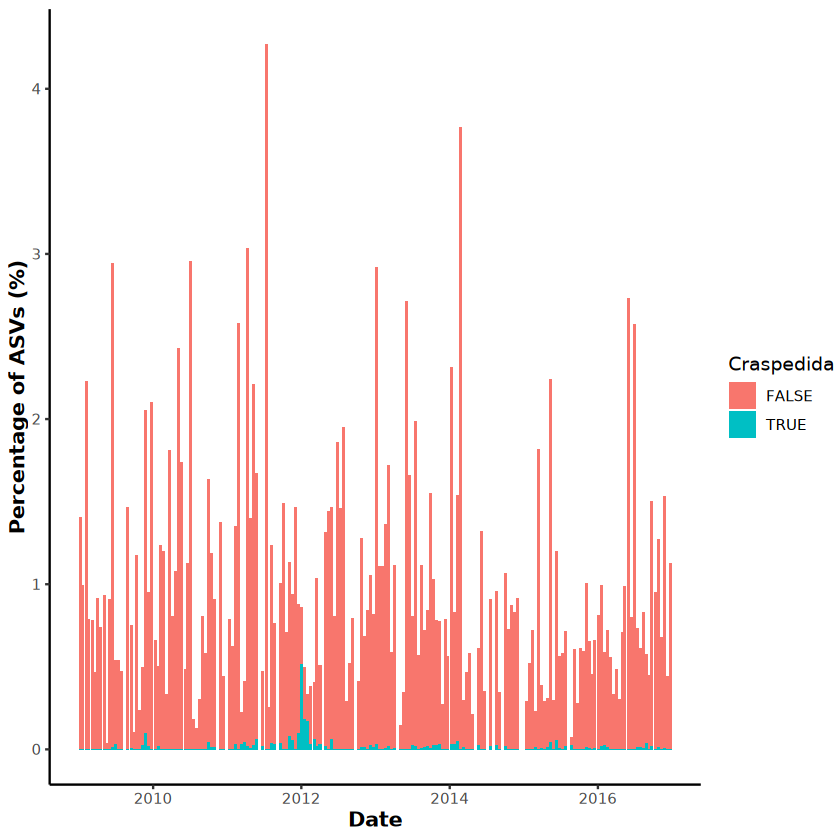

In [20]:
choanoASVprop <- ggplot(data5_long %>% filter(choanoflagellates==T)) +
    geom_col(aes(x=as.Date(name), y=proportion, fill=Craspedida), position="stack")+
    theme_classic()+
    labs(x= "Date", y="Percentage of ASVs (%)", fill = "Craspedida")+
    theme(axis.title=element_text(size=12, face="bold"))
choanoASVprop

ggsave(choanoASVprop, file="Output/Figures/choanoASVprop.png")

Nous observons que la proportion d'ASVs de Choanoflagellés est faible (ne dépasse pas 5% des reads de chaque échantillons). La contribution des Craspedida est minine (inférieur à 0,5%). Il semble également qu'il y ait une cyclicité (**à vérifier**).

In [21]:
# Création de jeux de données ciblant les groupes qui nous intéressent :
choa <- data5_long %>% filter(choanoflagellates ==T)
crasp <- data5_long %>% filter(Craspedida ==T)

Nous cherchons maintenant à visaliser l'évolution temporelle de chaque amplicon Craspedida :

Saving 7 x 7 in image


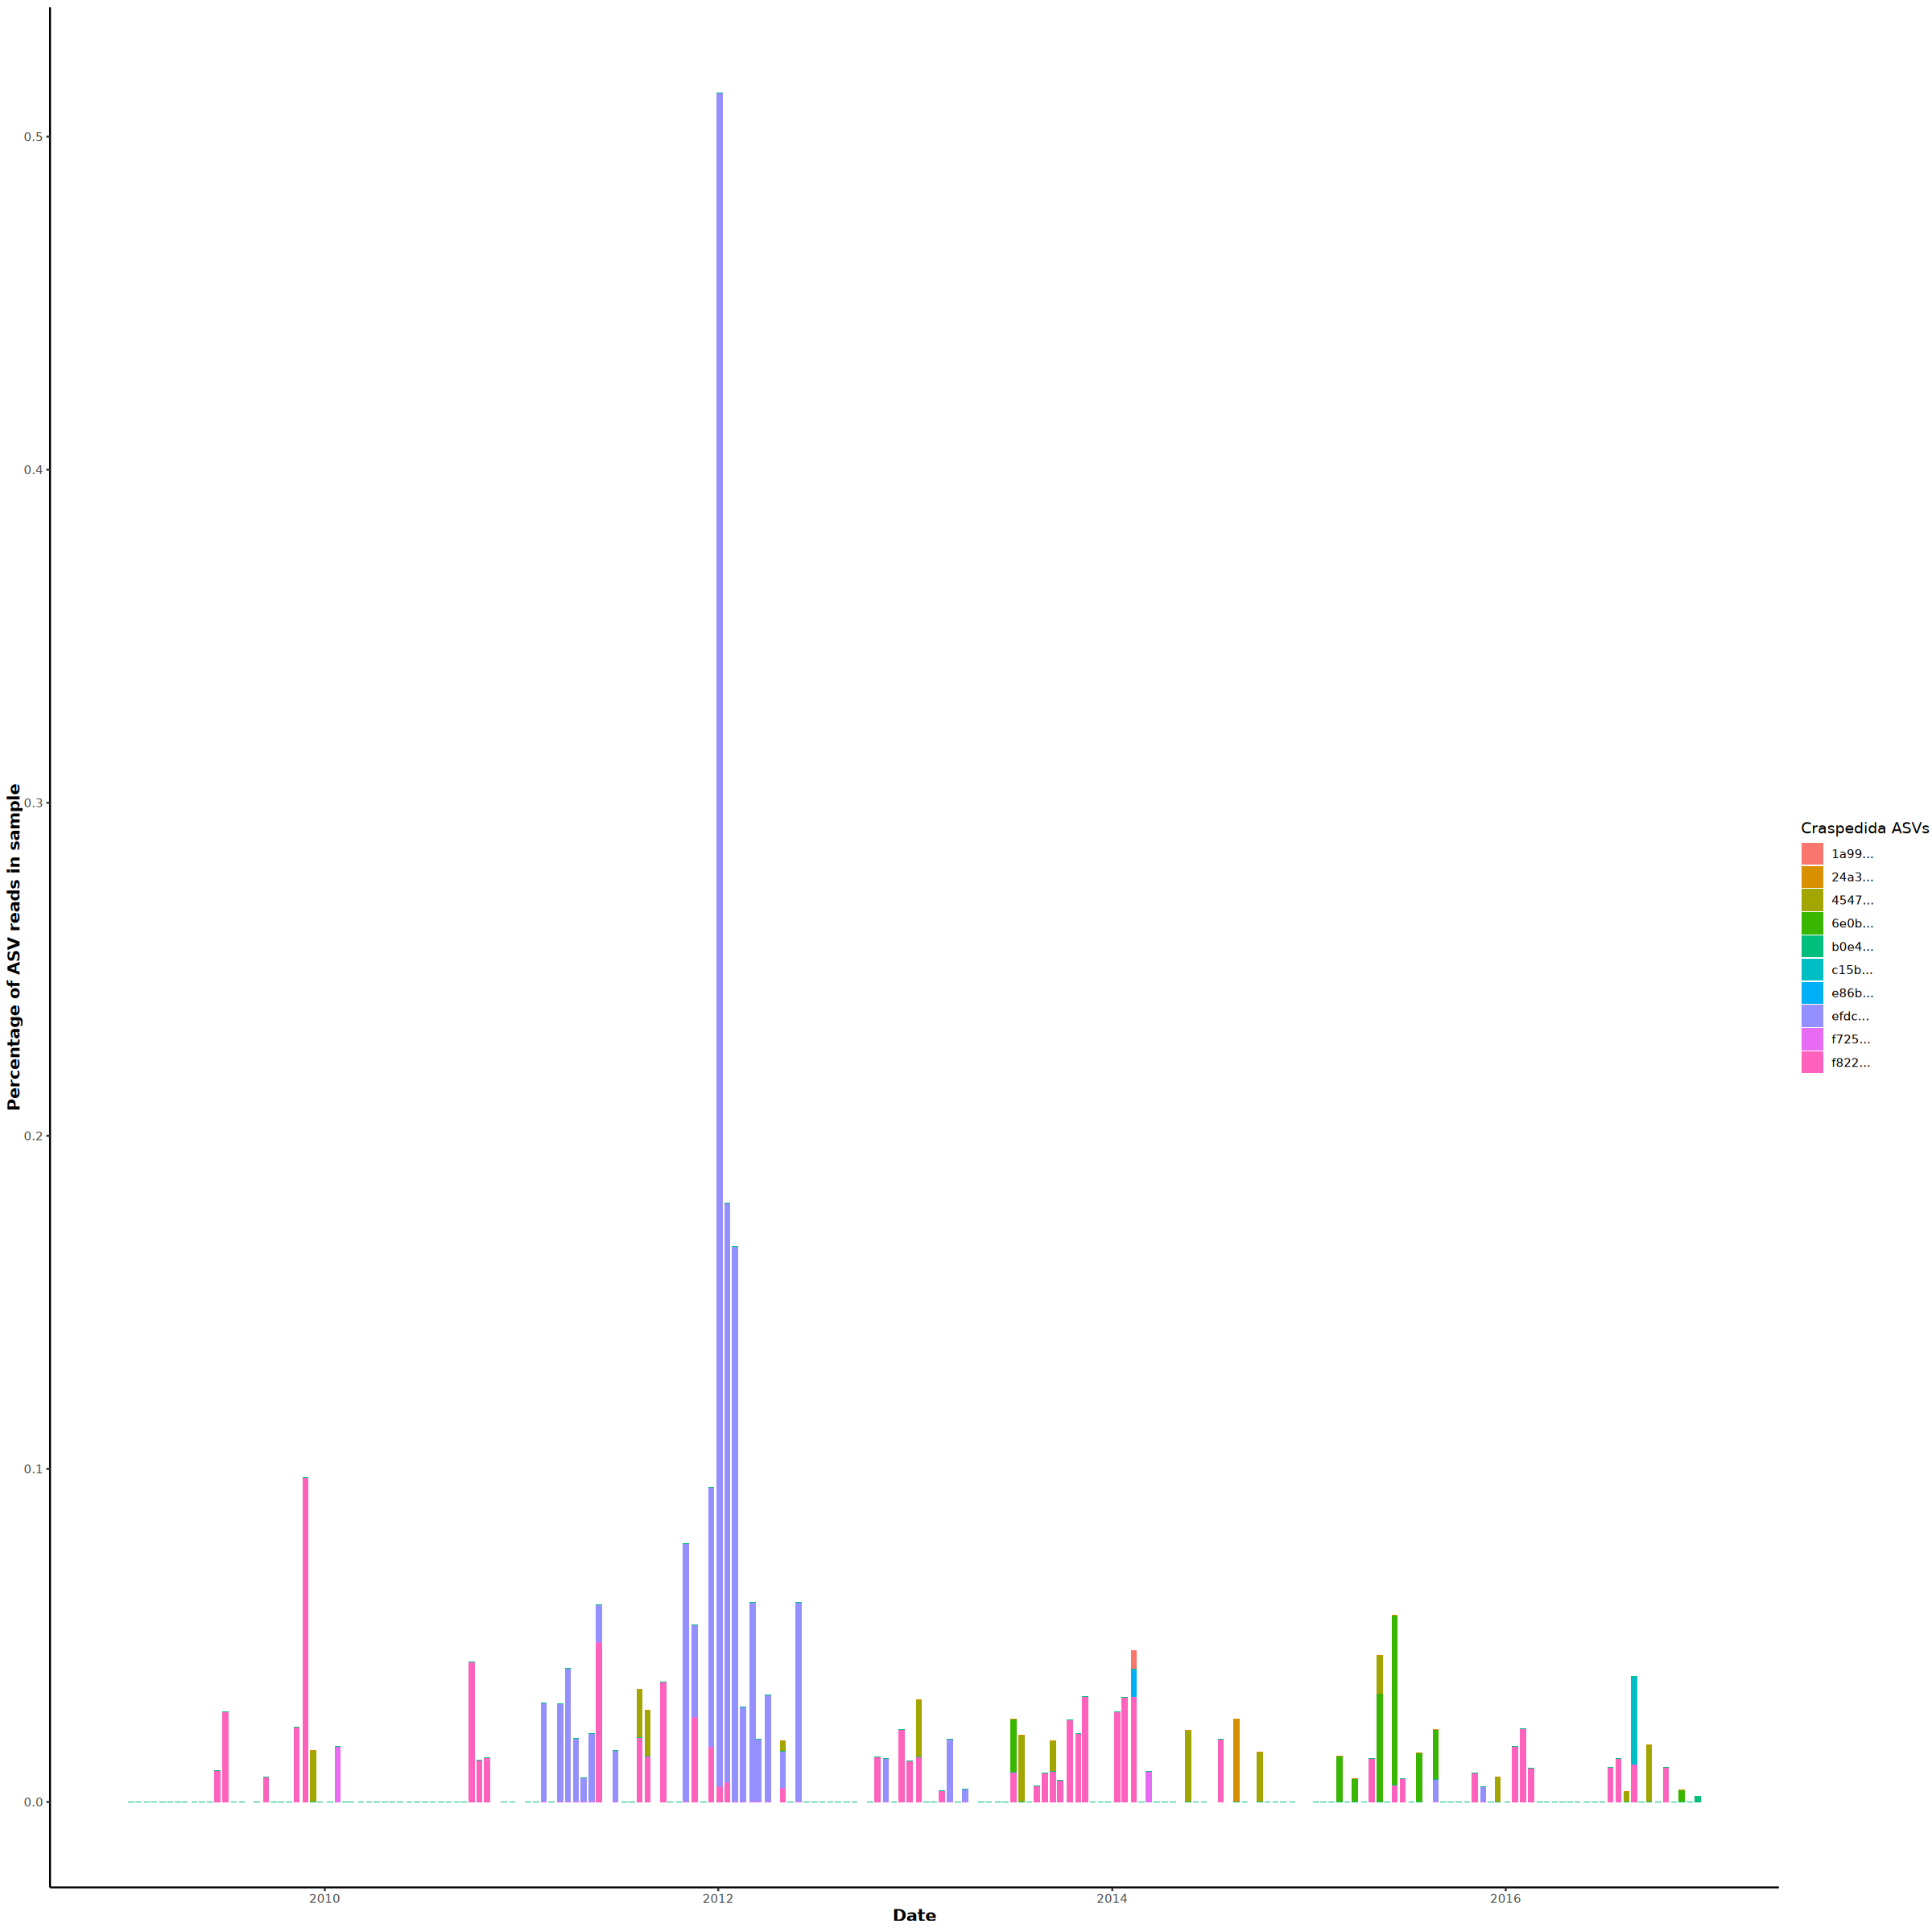

In [22]:
options(repr.plot.width=20, repr.plot.height=20)
crasp_dyn <- ggplot(crasp) +
    geom_col(aes(x=as.Date(name), y=proportion, fill=amplicon), position="stack")+ 
    #facet_wrap(vars(amplicon), ncol=1)+
    theme_classic()+
    labs(x= "Date", y="Percentage of ASV reads in sample", fill = "Craspedida ASVs")+
    theme(axis.title=element_text(size=12, face="bold"))+
    scale_fill_hue(labels = c("1a99...", "24a3...", "4547...", "6e0b...", "b0e4...", "c15b...", "e86b...", "efdc...","f725...", "f822..." ))
    #les labels des amplicons ont été changés pour les raccourcir 
crasp_dyn
ggsave(crasp_dyn, file = "Output/Figures/crasp_dyn.png")

Nous observons qu'en 2012, et notamment dans un échantillon de cette année, le pourcentage de reads de l'ASV "efdc.." est particulièrement élevé (jusqu'à deux fois plus grand que tout autre ASV).
Nous remarquons que la fréquence d'apparition et la proportion varie fortement selon les amplicons. 
4 amplicons se démarquent visuellement : 
- **"f822"** en rose qui est le plus régulier le long de la période d'échantillonnage,
- **"efdc"** en violet qui contribue le plus, au nombre total d'ASV et dont la contribution semble former un "*pulse*" sur une courte période entre 2011 et 2013,
- **"6eOb"** en vert foncé qui n'est présent qu'à partir de 2013 et se retrouve dans les échantillons sur plusieurs mois de 2015,
- **"4547"** en ocre qui malgrès sa relativement faible contribution, apparaît plusieurs fois sur la période d'échantillonnage.

Les résultats du tableau ci-dessous confirment ces observations.

In [23]:
 # Selectionner que les ASV "abondants" dans le temps
(crasp_pres <- crasp %>%
    group_by(amplicon) %>%
    summarise(Total = sum(value), #total de reads 
              Num_pres = sum(value>0))%>%
    arrange(desc(Total), desc(Num_pres))) #nombre de présence 

amplicon,Total,Num_pres
<chr>,<int>,<int>
efdc269bb6ebb9e174d1bc1d74ef088587531a90,1302,25
f822591579b7040ffc808e1159eb1dd193c31a5f,497,45
6e0bb9bee31edeec6da5cb1cc165aa7ebe1be800,141,8
4547c94ba92107492a9fb1cb6bf200df88640600,116,13
c15bb8b8d3ea3da696cab20ab0c420e0108228d4,46,1
f725641f201301c4457b69988508a25c660d5442,13,2
24a31a7ff656b3d5bc40122dfe960566900b4069,7,1
e86b761c583adb5e1c9f63ea98f684a4048f3c57,6,1
1a99e0a440d81c91250d16554128f8ed8c6db5ba,4,1


*Afin de comprendre la dynamique temporelle de chaque amplicon, il serait intéressant d'analyser en complément les paramètres environnementaux.*

## 4) Ré-assignations taxonomiques

Nous souhaitons actualiser (si possible) l'assignation taxonomique qui a été faite dans le jeu de données initial (méthode IDTAXA avec la base de référence PR2 version 4.14), pour essayer de mieux caractériser la diversité des Craspedida. Pour cela, 3 différentes approches ont été utilisées :
- **IDTAXA** avec PR2 version 5.0.0 (version la plus récente),
- **VSEARCH** avec PR2 version 5.0.0,
- **EPA-ng** à partir d'un arbre de référence.

Il nous faut d'abord créer des fichiers FASTA contenant les séquences des ASVs, ici contenant les séquences associés aux Choanoflagellés et Craspedida. Pour cela nous utilisons le package **Biostrings** et les fonctions **DNAStringSet** et **writeXStringSet**.

In [24]:
#Create a DNAStringSet object pour les Choanoflagellés
fasta_sequences_choa <- DNAStringSet(data5 %>% filter(choanoflagellates)%>% pull(sequence))
names(fasta_sequences_choa) <- data5 %>% filter(choanoflagellates==T)%>% pull(amplicon)

fasta_sequences_choa
#Write to a FASTA file
writeXStringSet(fasta_sequences_choa, filepath = "Output/ASV_choa.fasta")

DNAStringSet object of length 84:
     width seq                                              names               
 [1]   379 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 99a7ff63f92f312ce...
 [2]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 09d48faf4ae44a83b...
 [3]   376 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA fb3abf2cde17516fe...
 [4]   379 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA aa1a809a64c8640b3...
 [5]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 174ba5eb2f17d82cb...
 ...   ... ...
[80]   379 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA e86b761c583adb5e1...
[81]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 43bc90e957ed178ad...
[82]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 92b667463ee9872aa...
[83]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 7d43a5a85b35b286c...
[84]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA b0e4207478c31f712...

In [25]:
# Create a DNAStringSet object pour les Craspedida
fasta_sequences_crasp <- DNAStringSet(data5 %>% filter(Craspedida == T)%>% pull(sequence))
names(fasta_sequences_crasp) <- data5 %>% filter(Craspedida == T)%>% pull(amplicon)
fasta_sequences_crasp
# Write to a FASTA file
writeXStringSet(fasta_sequences_crasp, filepath = "Output/ASV_crasp.fasta")

DNAStringSet object of length 10:
     width seq                                              names               
 [1]   381 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA efdc269bb6ebb9e17...
 [2]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA f822591579b7040ff...
 [3]   386 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 6e0bb9bee31edeec6...
 [4]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 4547c94ba92107492...
 [5]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA c15bb8b8d3ea3da69...
 [6]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA f725641f201301c44...
 [7]   379 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 1a99e0a440d81c912...
 [8]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA 24a31a7ff656b3d5b...
 [9]   379 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA e86b761c583adb5e1...
[10]   378 AGCTCCAATAGCGTATATTAAAG...GCATTTGCCAAGGATGTTTTCA b0e4207478c31f712...

### A) IDTAXA avec PR2 5.0.0

In [26]:
input <- "Output/ASV_choa.fasta"
threads <- 2 |> as.numeric()
trainingSet <- readRDS("Input/pr2_version_5.0.0_SSU.decipher.trained.rds")
output <- "Output/idtaxa_v2.tsv"

ASVs <- Biostrings::readDNAStringSet(input)

ASVs_assign <- DECIPHER::IdTaxa(ASVs, trainingSet, strand = "top", threshold=60, processors = threads)

taxonomy <- vapply(ASVs_assign, function(X) paste(X$taxon,collapse=";"), character(1))

confidence <- vapply(ASVs_assign, function(X) paste(round(X$confidence,digits=1),collapse=";"), character(1))

data.table(names(taxonomy),taxonomy,confidence) |> fwrite(file=output, sep="\t", quote=FALSE, col.names=TRUE)


Time difference of 96.66 secs



ERROR: Error in fwrite(data.table(names(taxonomy), taxonomy, confidence), file = output, : Permission denied: 'Output/idtaxa_v2.tsv'. Failed to open existing file for writing. Do you have write permission to it? Is this Windows and does another process such as Excel have it open?


In [ ]:
#visualisation des résultats de la nouvelle assignation
idtaxa_v2 <- read.table("Output/idtaxa_v2.tsv", header = TRUE, sep = "\t")

#isoler les résultats pour le clade Craspedida
idtaxa_v2 <- mutate(idtaxa_v2, Craspedida = grepl("Craspedida", taxo, ignore.case = TRUE))
craspedida_v2 <- filter(idtaxa_v2, Craspedida==TRUE)

#Comparaison avec première assignation IDTAXA
craspedida_v1 <- filter(data5, Craspedida==TRUE)

crasp_idtaxav1_v2 <- craspedida_v1 %>% select(amplicon, taxonomy, confidence)%>%
                            left_join(craspedida_v2 %>% select(V1, taxo, confidence), by = c("amplicon"="V1"))

names(crasp_idtaxav1_v2) <- c("amplicon", "idtaxa_taxo_v1", "confidence_v1", "idtaxa_taxo_v2", "confidence_v2")
crasp_idtaxav1_v2

On retrouve les 10 mêmes amplicons assignés aux Craspedida qu'avec l'ancienne version PR2, et l'assignation taxonomique s'arrête aux mêmes rangs taxonomiques que précédemment.

### B) VSEARCH (avec PR2 5.0.0)

VSEARCH est un algorithme d'assignation taxonomique basé sur le principe de similarité entre séquences (similaire à BLAST). L'assignation se fait donc en fonction de la (ou des) séquence(s) de référence la(les) plus proche(s) de la séquence "query". \
Le script utilisé pour cette partie est un script .bash, disponible et décrit en **<mark>première partie</mark>** du second notebook (**taxoassign-bash.ipynb**).

In [ ]:
#Résultats de VSEARCH
vsearch <- read.delim("Output/nextflow/vsearch_best_hit.tsv")
View(vsearch)

### C) Placement phylogénétique avec EPA-ng

L'arbre de référence utilisé provient de l'article de Hake *et. al* (2024) intitulé ["A large colonial choanoflagellate from Mono Lake harbors live bacteria"](https://doi.org/10.1128/mbio.01623-24). Les données de cette arbre sont téléchargeables en cliquant sur le [lien](https://figshare.com/ndownloader/articles/14474214/versions/5).
Il faut ensuite extraire du dossier téléchargé, le sous-dossier "tree_Figure_1C.zip/RAxML et le sauver dans son environnement de travail dans le dossier '***Input***' (*working directory*).

Avant d'effectuer le placement phylogénétique, il nous faut convertir l'arbre en format nexus en un arbre enraciné au format newick. Pour cela nous utilons des fonctions provenant du package **ape**.

#### 1) Préparation de l'arbre de référence

In [ ]:
# Upload de l'arbre de référence (citation article) non enraciné
tree_nexus <- read.nexus("Input/18S_EFL_HSP90.concatenated.nex.con.tre", tree.names = NULL, force.multi = FALSE)

In [ ]:
# On détermine le groupe extérieur qui permet d'enraciner l'arbre phylogénétique. 
tree_nexus$tip.label #espèces des noeuds terminaux
# Ici c'est un groupe de 7 espèces de Métazoaires
outgroup <- c("Amphimedon_queenslandica", "Capitella_teleta", "Daphnia_pulex", "Trichoplax_adhaerens", "Nematostella_vectensis", "Mnemiopsis_leidyi", "Mus_musculus")  
# Enracinement 
tree_rooted <- root(tree_nexus, outgroup,  resolve.root = TRUE)
# Visualisation de l'abre
plot(tree_rooted)

**/!\ Nous remarquons que les espèces *Salpingoeca tuba* et *Salpingoeca dolichothecata* ne sont pas placées dans le groupe des Craspedida comme représenté dans la figure de l'article de référence...**

In [ ]:
# Sauvegarde de l'arbre au format newick dans le dossier Output
write.tree(tree_rooted, file="Output/Ref_tree.nwk")

#### 2) Calcul des placements phylogénétiques

Maintenant que l'arbre phylogénétique ai été converti et enraciné, nous pouvons calculer le placement phylogénétique de nos séquences ASVs.
Pour cela, il faut faire tourner la <mark>***deuxième partie***</mark> du notebook bash nommé **taxoassign-bash.ipynb**.
Vous pourrez ensuite, faire tourner la suite de ce notebook. 

#### 3) Visualisation des placements phylogénétiques

Nous utilisons plusieurs packages : **tidytree**, **treeio**, et **ggtree**

In [ ]:
#Importation des résultats de placements 
placement_res <-  treeio::read.jplace("Output/epa_result.jplace") 

In [ ]:
# Visualisation du tableau des placements
placement_res@placements %>%
  arrange(name, -likelihood) %>%
  head()

In [ ]:
# Visualisation des placements sur l'arbre 

phylo_tree <- tidytree::treedata(phylo = placement_res@phylo, data = placement_res@placements) %>%
    ggtree::ggtree() +
    ggtree::geom_tiplab()+
    geom_point(aes(colour = name, size = like_weight_ratio), alpha = 0.6)+
    xlim(0, 1)

phylo_tree
ggsave(phylo_tree, file="Output/Figures/Final_phylo_tree.png")

Il y a beaucoup de points qui se superposent, alors nous voulons regarder le placement des 4 ASVs les plus abondants :

In [ ]:
phylo_tree_4 <- treedata(phylo = placement_res@phylo, data = placement_res@placements %>% filter(name %in% pull(crasp_pres %>% filter(Num_pres>5)
                                                                                                                        %>% select(amplicon)))) %>%
    ggtree::ggtree() +
    ggtree::geom_tiplab()+
    geom_point(aes(colour = name, size = like_weight_ratio), alpha = 0.4)+
    xlim(0, 1)

phylo_tree_4
ggsave(phylo_tree_4, file="Output/Figures/Final_phylo_tree_4.png")

Afin de retrouver l'ensemble des espèces des noeuds terminaux rattachées à un ASV d'un noeud intermédiaire, nous avons céer une fonction ***find_terminal_lables()*** qui prend en entrée le chemin du ficher correspondant au placement sur l'arbre phylogénétique de référence au format **.jplace** et le nom du ficher avec le nom des amplicons placés dans le fichier précédent. Il retourne un dataframe de 2 colonnes : **amplicon** et **terminal_nodes_label**.

In [ ]:
find_terminal_labels <- function(tree_place, data) {
    # tree_place : character
    # data : data frame 
    
    # load tree placement data 
    placement_res <-  treeio::read.jplace(tree_place)
    #find amplicon names of interests
    ASV_list <- data %>% pull(amplicon) %>% unique()
    #print(ASV_list)


    #get nodes linked to ASV placement on tree
    nodes_placements <- list(placement_res@placements$node)[[1]]
    #get number of terminal nodes (that have labels)
    nodes_with_names <- as_tibble(placement_res@phylo) %>%
            filter(!is.na(label))
    #prepare output dataframe
    taxo <- data.frame(amplicon = NA, terminal_nodes_label = NA)
    
    for (asv in ASV_list) {
        #print(asv)
        #get nodes associated to particular ASV
        my_nodes <- placement_res@placements %>%
            filter(name == asv) %>%
            arrange(desc(like_weight_ratio)) %>%
            #filter(1 - cumsum(like_weight_ratio) < 0.05) %>%
            pull(node)
        #print(paste0("My nodes are:", my_nodes))
        #get offspring terminal nodes of ASV node
        my_offspring_nodes <- offspring(placement_res@phylo, my_nodes, type="tips") %>%
            unlist() %>%
            unname() %>%
            unique()
        #print(paste0("offsprings :", my_offspring_nodes))
        
        #combine
        my_nodes <- c(my_nodes,my_offspring_nodes)
        #print(my_nodes)
        #keep only terminal nodes and their label
        term_node_placements <- nodes_with_names %>%
            filter(node %in% my_nodes) %>%
            pull(label)
        #print(term_node_placements)
        
        if (length(term_node_placements) !=0) {
            #add to return dataframe
            add_taxo <- data.frame(amplicon = asv, terminal_nodes_label = term_node_placements)
            #print(add_taxo)
            taxo <- bind_rows(taxo, add_taxo)}
        }
    #print(taxo)
    return (drop_na(taxo)) #drop_na() pour enlever la première ligne de NA
    }
    

In [ ]:
taxo_phylo_crasp <- find_terminal_labels("Output/epa_result.jplace", crasp)
head(taxo_phylo_crasp)

Nous cherchons à résumer le dataframe obtenue pour n'avoir qu'une ligne par amplicon. Pour cela nous concaténons le nom des labels.

In [ ]:
summary_taxo_phylo_crasp <- taxo_phylo_crasp %>% 
    group_by(amplicon) %>%
    summarise(number = length(terminal_nodes_label),
             list_taxo = str_c(terminal_nodes_label, collapse ="|"))
summary_taxo_phylo_crasp

### D) Tableau comparatif final

Afin de comparer les restulats des différentes méthodes d'assignation taxonomique, nous regroupons tous les résultats en un seul tableau.

In [ ]:
reassign_crasp <- vsearch %>% select(asv_id, lca_taxonomy) %>%
                                            left_join(crasp_idtaxav1_v2 %>% select(-c("confidence_v1", "confidence_v2")), by=c("asv_id"="amplicon"))%>%
                                            left_join(summary_taxo_phylo_crasp, by= c("asv_id"= "amplicon")) %>%
                                            rename("list_taxo"= "EPA_ng_Sp_list","lca_taxonomy"="vsearch_taxo","number"="EPA_ng_num") %>%
                                            relocate(EPA_ng_num, .after = last_col())
                                                      
crasp_idtaxav1_v2_vsearch
#Saving results in tabular format
write.table(reassign_crasp, file = "Output/reassign_crasp_final.tsv", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

Pour finir nous voulons rapidement vérifier que notre première hypothèse (taille des choanoflagellés compris entre 2µm et 20µm) ne nous a pas fait sous-estimer notre 

In [37]:

data %>% mutate(Craspedida = grepl("Craspedida", taxonomy, ignore.case = TRUE)) %>%
    mutate(Read_diff = total - rowSums(select(., ends_with("3")))) %>% filter(Craspedida == T)



#data5 %>% mutate(Read_diff = total - rowSums(select(., starts_with("20")))) %>% filter(Craspedida == T)

amplicon,taxonomy,confidence,sequence,total,spread,RA140605.3,RA150227.3,RA140423.3,RA140522.3,⋯,RA160909.02,RA160923.02,RA161010.02,RA161024.02,RA161108.02,RA161122.02,RA161207.02,RA161222.02,Craspedida,Read_diff
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<dbl>
efdc269bb6ebb9e174d1bc1d74ef088587531a90,Root;Eukaryota;Opisthokonta;Choanoflagellida;Choanoflagellatea;Craspedida;Monosigidae_Group_A;Choanoeca;Choanoeca_perplexa,100;100;100;100;100;100;100;100;100,AGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGACTTCTGGCGTTGAGGTGTCGGTCCGCCGCAAGGTGTGCACTGCGCTTCGTCGCCATCCTTCTTGAGGAGCGTGTGTGCCCTTAATTGGGTGGATGCGCGACTCGAGACCTTTACTTTGAAAAAATCAGCGCGTTCAAAGCAGGCTTCTCGCTTGAATGTACTAGCATGGAATAATAGAATAGGACTTTGGTTTTATTTTGTTGGTTTCTAAGACCGAAGTAATGATTAATAGGGATAGTTGGGGGCATTCGTATTTAATTGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACATCTGCGAAAGCATTTGCCAAGGATGTTTTCA,2402,43,0,0,0,0,⋯,0,0,0,0,0,0,0,0,TRUE,1100
f822591579b7040ffc808e1159eb1dd193c31a5f,Root;Eukaryota;Opisthokonta;Choanoflagellida;Choanoflagellatea;Craspedida;Monosigidae_Group_B;Monosigidae_Group_B_X;Monosigidae_Group_B_X_sp.,74.4;74.4;72.9;70.6;70.6;70.6;70.6;68.2;68.2,AGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGATGTCTGGCTTTGTGTTGCGGTCCACCGCGAGGTGAGCACTGCGATGTGGAGTCTTCCTCTTGAATGTGGCGTGTGCTCTTAGTTGAGTGTGCGTTGTGTTTGGGATCTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTGCTTGAATATATTAGCATGGAATAATGGAATAGGACTTTGGTTCTATTTTGTTGGTTTCTAGGACCGAGGTAATGATTAATAGGGGTAGTTGGGGGCATTCGTATTTAATTGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACTTCTGCGAAAGCATTTGCCAAGGATGTTTTCA,680,73,0,0,0,0,⋯,0,0,0,0,0,0,0,0,TRUE,183
6e0bb9bee31edeec6da5cb1cc165aa7ebe1be800,Root;Eukaryota;Opisthokonta;Choanoflagellida;Choanoflagellatea;Craspedida;Monosigidae_Group_M;Salpingoeca_M;unclassified_Salpingoeca_M,100;100;100;100;100;100;100;100;100,AGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGATTTCGGCGATGCGTACGGTGGTCCGCCGCAAGGCGAGCACTGCCGTGGTGTCGCTTTTTTTCTCGGCGCCGCCGTGTGCCCTTGATTGGGTGTGCGGATTCTGGAGCCGGGACCTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGTTTCGCTTGAATAGATTAGCATGGAATAATGGAATAGGACTTTGGTCTTATTTTGTTGGTTTCTAGGACCGAAGTAATGATTAATAGGGACAGTTGGGGGCATTAGTATTTAATTGCTAGAGGTGAAATTCTTGGATTTATGAAAGACTAACTACTGCGAAAGCATTTGCCAAGGATGTTTTCA,370,24,0,4,0,0,⋯,0,0,0,0,0,14,0,0,TRUE,229
4547c94ba92107492a9fb1cb6bf200df88640600,Root;Eukaryota;Opisthokonta;Choanoflagellida;Choanoflagellatea;Craspedida;Monosigidae_Group_B;Monosigidae_Group_B_X;Monosigidae_Group_B_X_sp.,75.8;75.8;75.3;73.1;73.1;70.7;70.7;69.5;69.5,AGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGATGTCTGGCTTTGTGTTGCGGTCCACCGCGAGGTGAGCACTGCGATGTGGAGTCTTCCTCTTGAATGTAGCGTGTGCTCTTAGTTGAGTGTGCGTTGTGTTTGGGATCTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTGCTTGAATATATTAGCATGGAATAATGGAATAGGACTTTGGTTCTATTTTGTTGGTTTCTAGGACCGAGGTAATGATTAATAGGGGTAGTTGGGGGCATTCGTATTTAATTGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACTTCTGCGAAAGCATTTGCCAAGGATGTTTTCA,201,24,0,0,0,8,⋯,0,0,0,0,0,0,0,0,TRUE,85
c15bb8b8d3ea3da696cab20ab0c420e0108228d4,Root;Eukaryota;Opisthokonta;Choanoflagellida;Choanoflagellatea;Craspedida;Monosigidae_Group_M;Salpingoeca_M;Salpingoeca_urceolata,99;99;99;99;99;99;99;99;99,AGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGGATTTCTGATCTTGGGAGGCGGTCCGCCGAGAGGTGTGCACTGTCTGCCGAGGTCTTTCCTCCCGACGTCTGCGTGTGCTCTTAACTGAGCGTGCGTGTGGCTCGGGACCTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCTTCGCTTGAATACATTAGCATGGAATAATGGAATAGGACTTTGGTTCTATTTTGTTGGTTCTAGGACCGAAGTAATGATTAATAGGGATGGTTGGGGGCATTAGTATTTAATTGTCAGAGGTGAAATTCTTAGATTTATGAAAGACTAACTACTGCGAAAGCATTTGCCAAGGATGTTTTCA,102,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,TRUE,56
f725641f201301c4457b69988508a25c660d5442,Root;Eukaryota;Opisthokonta;Choanoflagellida;Choanoflagellatea;Craspedida;Monosigidae_Group_B;Lagenoeca;Lagenoeca_antarctica,100;100;100;100;100;100;100;60.5;60.5,AGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGATTTCTGGGCCTGTACGGTGGTCCGCCGCAAGGTGAGCACTGCTGTGTGGGCCCTTCCTCTCGAAGGCTGCGTGTGCTCTTAACTGGGTGTGCGTGGGATTCGGGATCTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGTTTGCTTGAATATATTAGCATGGAATAATCGAATAGGACTTTGGTTCTATTTTGTTGGTTTCTAGGACCGAAGTAATGATTAA

## Conclusion 

L'analyse par Metabarcoding des échantillons de la station Astan à permi de déterminer la présence  de 10 ASVs assigné a des Craspedida entre 2009 et 2016.
La comparaison des résultats des différentes méthodes d'assignation taxonomique et du placement phylogénétique, nous a permis d'élaborer une liste des taxons de Craspedida présents à la Station Astan :
- 